# <div align='center'>第8章 非参数统计(2)</div>

In [2]:
%reset -f
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import statsmodels.stats.anova as sma
import statsmodels.formula.api as smf
import statsmodels.stats.api as smt
import statsmodels.api as sm
from statsmodels.graphics.mosaicplot import mosaic
import seaborn as sns
import patsy
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

## 8.4 多组数据位置推断

### 8.4.1 Kruskal-Wallis单因素方差分析

Kruskal-Wallis H检验是一种非参数方法，用于测试三个或更多独立样本是否可能来自相同的总体。它在设计上是用来测试独立样本的中位数是否相同。这个检验在数据分布不适合进行标准ANOVA时特别有用，或者在你的数据是有序分类的，不符合参数检验的标准。

举个例子，假设你是一名医学研究人员，正在研究三种不同的抗生素对于某种病菌的抑制能力。在实验中，你随机给病人分配三种不同的抗生素，并且记录病人的恢复时间。你的目标是看看是否存在一种抗生素可以更快地帮助病人恢复。

在这个例子中，恢复时间是定量的，但也可能是不平滑的，因为恢复时间可能由组内的一个或几个大的观测值影响，而且恢复时间的总体分布可能并不是正态的。此外，由于抗生素之间可能存在交互作用，因此恢复时间的离散程度（方差）在各组之间可能不同。因此，你可能认为使用Kruskal-Wallis H检验来比较三组的恢复时间。

你可以用Python的scipy.stats.kruskal函数来执行Kruskal-Wallis H检验。

#### 例：
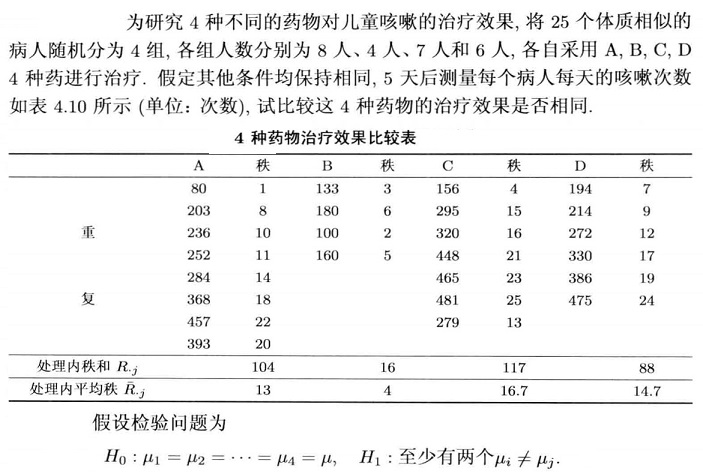

In [3]:
'''
手工编码实现
'''
r1=np.array([1,8,10,11,14,18,22,20])
r2=np.array([3,6,2,5])
r3=np.array([4,15,16,21,23,25,13])
r4=np.array([7,9,12,17,19,24])
n1=len(r1)
n2=len(r2)
n3=len(r3)
n4=len(r4)
n=n1+n2+n3+n4
R1=np.sum(r1)
R2=np.sum(r2)
R3=np.sum(r3)
R4=np.sum(r4)
sst=((R1**2)/n1+(R2**2)/n2+(R3**2)/n3+(R4**2)/n4)-(n*(n+1)**2)/4
mst=n*(n+1)/12
h=sst/mst
chisq_alpha=st.chi2.ppf(0.95,3)
pvalue=st.chi2.sf(h,3)
print('H=%0.8f统计量大于自由度为3，alpha=0.05处的卡方值：%0.8f。'%(h,chisq_alpha))
print('拒绝4种药物疗效相等的原假设。')
print('假设检验的P值为:%0.8f,小于alpha，拒绝原假设。'%pvalue)

H=8.07208791统计量大于自由度为3，alpha=0.05处的卡方值：7.81472790。
拒绝4种药物疗效相等的原假设。
假设检验的P值为:0.04454512,小于alpha，拒绝原假设。


In [4]:
'''
使用Kruskal-Wallis单因素方差分析检验四种药物的疗效是否相同。
结果表明：拒绝疗效相同的原假设。
'''
drug=np.array([80,203,236,252,284,368,457,393,133,180,100,160,156,
               295,320,448,465,481,279,194,214,272,330,386,475])
drugA=np.array([80,203,236,252,284,368,457,393])
drugB=np.array([133,180,100,160])
drugC=np.array([156,295,320,448,465,481,279])
drugD=np.array([194,214,272,330,386,475])
st.kruskal(drugA,drugB,drugC,drugD)

KruskalResult(statistic=8.072087912087923, pvalue=0.04454512424615835)

### 8.4.2 Friedman秩方差分析法

Friedman秩方差分析（Friedman Test）与Kruskal-Wallis H 测试（Kruskal-Wallis Test）都是非参数检验方法，用于比较三个或更多的样本。然而，它们在应用场景和对数据需求上有所不同。

Friedman秩方差分析应用于重复测量或匹配的数据，即同一组观测实体被多次测量或在不同条件下进行测量。比如，病患随时间的多次治疗效果，或者同组学生在不同教学方法下的成绩比较等。此方法检验的是在不同条件下的重复测量结果的区别。在实际处理中，每组被观测对象，会在每种处理条件下都要有一次测量数据。

Kruskal-Wallis H 测试用于独立的样本。比如不同患者群体接受不同治疗后的效果，或者不同年级的学生成绩的比较等。此方法检验的是不同总体（或不同独立样本）的中位数是否相同。各组被观测对象在不同处理条件下仅对应一次测量数据。

简单来说，独立样本用Kruskal-Wallis H 测试，相关样本或重复测量数据用Friedman秩方差分析。这里的相关是指：对同一组或者有联系的样本进行多次测试或者在多个条件下进行测试。这也是Friedman与Kruskal-Wallis的最大区别。

此外，Friedman秩方差分析对数据的需求相对严格一些：至少需要有两个相关样本，并且每个样本内的数据点数量应该相同。而Kruskal-Wallis测试在这些方面的要求较为宽松，并不要求样本内的数据点数量相同。

#### 例：
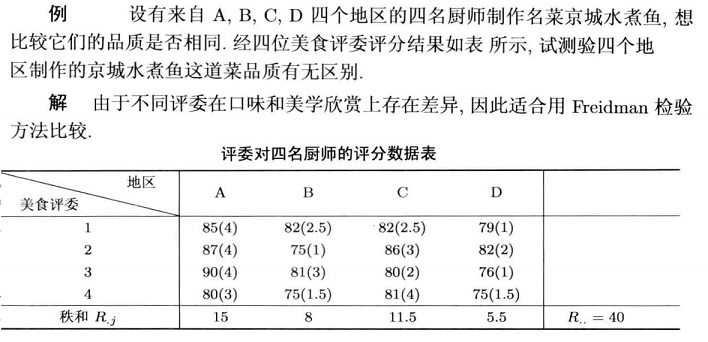
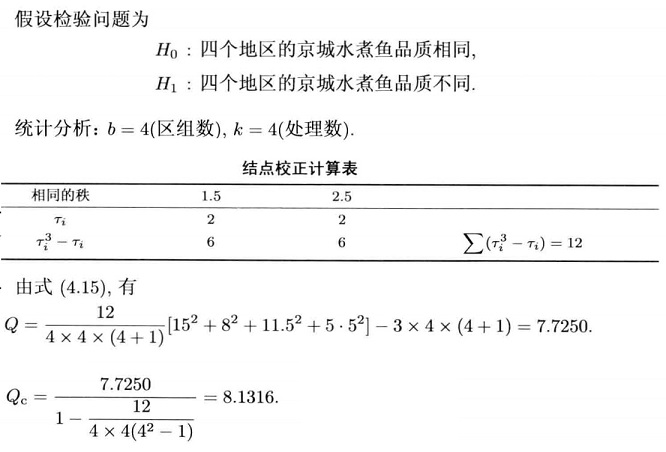
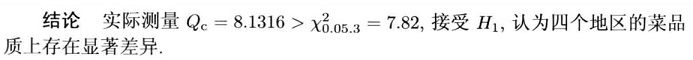

In [17]:
'''
可以按照上述公式计算Q统计量然后进行检验。
Scipy的friedmanchisquare函数有相同功能。
检验结果与上图中的计算结果一致。
'''
a=np.array([85,87,90,80])
b=np.array([82,75,81,75])
c=np.array([82,86,80,81])
d=np.array([79,82,76,75])
st.friedmanchisquare(a,b,c,d),st.chi2.sf(8.131578947368416,3)

(FriedmanchisquareResult(statistic=8.131578947368416, pvalue=0.0433692136979464),
 0.0433692136979464)

### 8.4.3 Hodges-Lehmann检验

对比起来，Friedman检验和Kruskal-Wallis检验更侧重于比较样本的排名和分布，而Hodges-Lehmann检验更专注于真实的数值差距，因此在处理有大量异常值的数据时，Hodges-Lehmann可能会是一种更好的选择

- #### 示例：
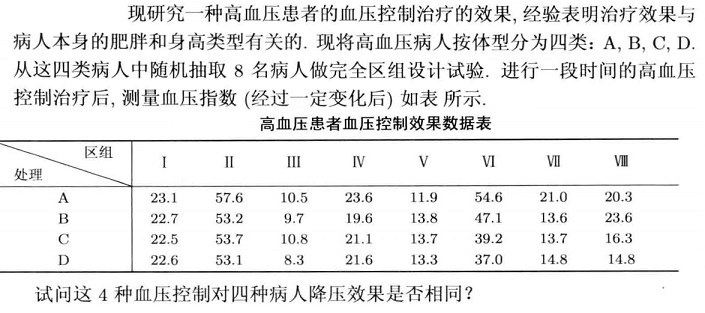

In [18]:
'''
根据上述公式计算HL统计量及其检验的p值。
'''
###HL调整秩计算过程
E=np.array([23.1,57.6,10.5,23.6,11.9,54.6,21.0,20.3])
F=np.array([22.7,53.2,9.7,19.6,13.8,47.1,13.6,23.6])
G=np.array([22.5,53.7,10.8,21.1,13.7,39.2,13.7,16.3])
H=np.array([22.6,53.1,8.3,21.6,13.3,37.0,14.8,14.8])
data=np.vstack([E,F,G,H])
ar_data=data-data.mean(axis=0)
rdata=(st.rankdata(ar_data)).reshape(4,8)

####HL检验计算过程
k=4
b=8
R_i=np.sum(rdata,axis=0)
R_j=np.sum(rdata,axis=1)
###无结点
Q_hat=(k-1)*(np.sum(R_j**2)-(k*b**2*(k*b+1)**2)/4)/ \
      (k*b*(k*b+1)*(2*k*b+1)/6-np.sum(R_i**2)/k)
###有结点
Q_hat1=(k-1)*(np.sum(R_j**2)-(k*(b**2)*(k*b+1)**2)/4)/ \
      (np.sum(rdata**2)-np.sum(R_i**2)/k)
###使用有结点HL统计量Q_hat1进行HL检验
pvalue=st.chi2.sf(Q_hat1,k-1)
print('HL检验统计量：',np.round(Q_hat1,4),'，p值：',np.round(pvalue,5))

###Friedman检验
friedman=st.friedmanchisquare(E,F,G,H)
print('\nFriedman检验统计量：',np.round(friedman.statistic,4),'，p值：',
      np.round(friedman.pvalue,5))

HL检验统计量： 8.5295 ，p值： 0.03625

Friedman检验统计量： 6.45 ，p值： 0.09166


In [19]:
###无结点Q统计量
pvalue1=st.chi2.sf(Q_hat,k-1)
print('HL检验统计量：',np.round(Q_hat,4),'，p值：',np.round(pvalue1,5))

HL检验统计量： 8.5263 ，p值： 0.0363


### 8.4.4 Cochran检验
当涉及到三种以上处理方法对样本的影响时，我们可以使用Cochran检验。它是二进制数据（例如，成功/失败或者是/否结果）的非参数统计检验方法。 Cochran检验通常被用来处理随机完全区组设计的数据，并比较处理方式或时间（因子水平）对结果的影响。

这种检验主要用于检验k个处理方法的效果是否存在差异。比如说，你可能想要比较不同的特殊教育方法对学生学习进步的效果，每个学生都试过每一种方法，而且每个结果是二进制的（成功或失败）。

Python中的scipy.stats库没有直接实现Cochran检验，你可能需要寻找其他开源库或者手动实现。

需要注意的是，Hodges-Lehmann检验，Friedman检验和Kruskal-Wallis检验主要用于检测两个或更多组的中位数是否相同，而Cochran检验则主要用于处理随块设计的二进制结果。意味着所有的样本被分成不同组，每组分别接收不同的处理方法，然后观察结果，每个结果都是二进制的（成功/失败或者是/否）。也就是说，首先，Cochran检验是用于处理二进制结果；其次，Cochran检验是针对随块设计的，即它假设每个随块在一定程度上都是相似的。

#### 示例：
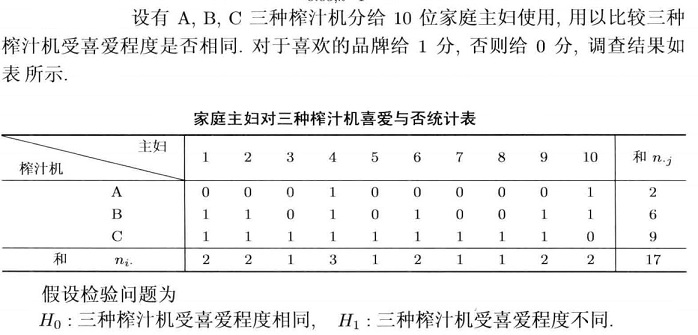

In [5]:
'''
使用StatsModels的cochrans_q函数。
'''
cand1=np.array([0,0,0,1,0,0,0,0,0,1])
cand2=np.array([1,1,0,1,0,1,0,0,1,1])
cand3=np.array([1,1,1,1,1,1,1,1,1,0])
cand=np.vstack([cand1,cand2,cand3])
result=smt.cochrans_q(cand.T)
print('自由度：',result.df,'\n统计量：',np.round(result.statistic,3),
      '\np值：',np.round(result.pvalue,5))

自由度： 2 
统计量： 8.222 
p值： 0.01639


Cochran检验并没有一个非常简单的计算公式。这是因为它涉及到对二维数组进行处理，其中包含多个唯一的配对组合。不过这里我提供一种基于手动实现Cochran检验的简化版本，仅供参考：

In [6]:
import numpy as np
from scipy.stats import chi2

def cochran_test(data):
    # 计算每一组的和
    row_sums = np.sum(data, axis=0) 
    # 计算总和
    total_sum = np.sum(row_sums) 
    # 计算每一行的平方和
    squared_row_sums = np.sum(np.square(row_sums)) 
    # 计算Cochran的Q值
    Q = (data.shape[1] / (data.shape[1]-1)) * ((data.shape[1] * squared_row_sums / total_sum) - data.shape[1])

    # 计算自由度
    df = data.shape[1] - 1
    # 查表得到p值
    p_value = chi2.sf(Q, df)
    
    return Q, df, p_value

cand1 = np.array([0,0,0,1,0,0,0,0,0,1])
cand2 = np.array([1,1,0,1,0,1,0,0,1,1])
cand3 = np.array([1,1,1,1,1,1,1,1,1,0])
cand = np.vstack([cand1, cand2, cand3]).T 

Q, df, p_value = cochran_test(cand)

print('自由度：', df)
print('统计量：', np.round(Q, 2))
print('p值：', np.round(p_value, 5))


自由度： 2
统计量： 27.53
p值： 0.0


在MR分析中，Cochran的Q检验的确是之前我们讨论的那种Cochran检验。它是一种用于检测各研究之间异质性的统计工具。
对于Cochran的Q检验，首先，它会计算每一项研究的效应大小。然后，再计算每一项研究的效应大小跟总体效应大小的偏离程度（也就是残差平方和），接着，计算的Q值会跟卡方分布进行对比，以此来评估这些残差是否显著（即，我们期望的差异大小是否在卡方分布的一定置信区间内）。

在MR分析中，Cochran的Q检验被用来评估所选择的各工具变量效应措施之间的一致性。这是检测异质性的一个步骤，因为一致性的偏差可能会对MR估计产生干扰，尤其是在使用基于一致性假设的方法（如IVW）时。特别要注意的是，如果Cochran的Q统计显著（即，P<0.05），那么就需要考虑更复杂的MR模型，例如混合模型或者使用鲁棒的方法，如MR-Egger回归，来进行更深入的异质性考虑。

----

## 8.5 分类数据的关联分析
关注变量与变量之间的关系

### 8.5.1 $r\times s$列联表和$\chi^2$独立性检验

- #### 例：
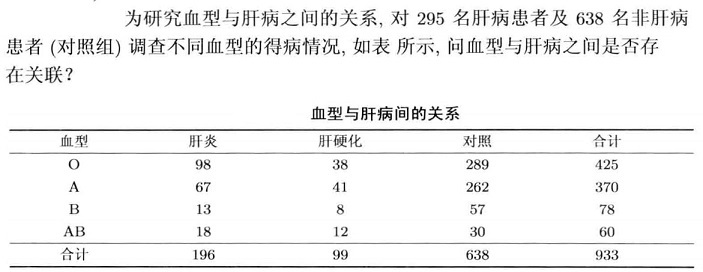

In [21]:
'''
chi2_contingency函数检验两个变量是否有关联关系。
原假设是变量独立。
本例中检验拒绝原假设，说明血型与肝病之间有关联关系。
'''
dataO=np.array([98,38,289])
dataA=np.array([67,41,262])
dataB=np.array([13,8,5])
dataAB=np.array([18,12,30])
data=np.vstack([dataO,dataA,dataB,dataAB])
result=st.chi2_contingency(data,correction=True)
print('统计量、p值以及自由度分别为：',result[0:-1])

统计量、p值以及自由度分别为： (40.89330935472587, 3.039226031646426e-07, 6)


### 8.5.2 Fisher精确性检验
Pearson $\chi^2$ 检验要求二维列表中只允许少于20%的格子期望数小于5，如果多于25%，即$2\times2$格子有一个数小于5不可使用Pearson $\chi^2$检验，此时可以使用$Fisher$精确性检验。
#### 例：
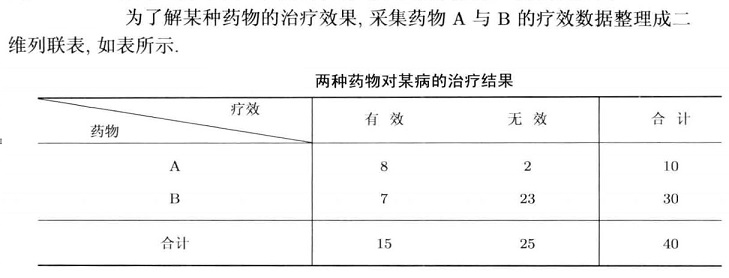

In [22]:
'''
此数据比较适合使用Fisher精确性检验
'''
medicine=np.array([[8,2],[7,23]])
st.fisher_exact(medicine, alternative='greater')

(13.142857142857142, 0.002428599577306265)

In [7]:
import numpy as np
import scipy.special

def fisher_exact_test(data,alternative='two-sided'):
    
    # 计算行和列的和
    row_sums = np.sum(data, axis=1)
    col_sums = np.sum(data, axis=0)
    
    # 计算总的样本数
    n = np.sum(col_sums)
    
    # 计算左边和右边的极端值
    left = np.min(col_sums)
    right = np.min(row_sums)
    
    # 计算当前表的比率
    ratio = (data[0,0] / data[0,1]) / (data[1,0] / data[1,1])
    
    # 计算 p 值
    p_value = 0
    for i in range(left, right+1):
        # 计算比率
        _ratio = (i / (col_sums[0]-i)) / ((row_sums[0]-i) / (n - row_sums[0]))
        # 计算概率
        _p = scipy.special.comb(col_sums[0],i) * scipy.special.comb(col_sums[1],row_sums[0]-i) / scipy.special.comb(n,row_sums[0])
        # 如果当前表的比率比设定的比率大，则加上这个概率
        if _ratio >= ratio:
            p_value += _p
    
    # 根据备择假设进行调整
    if alternative=='two-sided':
        p_value = min(1, 2*p_value)
    elif alternative=='greater':
        p_value = p_value
    elif alternative=='less':
        p_value = 1 - p_value
    
    return ratio, p_value

data = np.array([[8,2],[7,23]])
ratio, pvalue = fisher_exact_test(data,alternative='greater')
print('Odds Ratio: ', ratio, '\np value: ', pvalue)


Odds Ratio:  13.142857142857142 
p value:  0


### 8.5.3 Mantel-Haenszel检验

各个统计检验的选择主要取决于你的数据和研究问题的特性。以下是Mantel-Haenszel检验，Fisher精准检验和Pearson卡方检验的主要特点与区别：

Mantel-Haenszel 检验

    Mantel-Haenszel检验大多数用于分析分类数据，特别是在评估二分类结果的独立性时。它适用于研究的匹配设计，特别是在你需要控制一个或多个混杂因素时。也就是说，当你想知道在控制了其他变量之后，两个二元变量之间是否存在关系时，Mantel-Haenszel检验很有用。

Fisher 精准检验

    Fisher精准检验最初是为2x2列联表设计的，并且在期待频率太低（即某一单元格内的数量小于5）不能使用卡方检验的情况下使用。它非常适合于小样本研究，因为它能够精确地计算出观察到的差距（或更极端差距）出现的概率，而不是像卡方检验那样提供近似p值。

Pearson 卡方检验

    Pearson卡方检验是用于独立性检验的，即确定两个分类变量是否相关。其适用于大样本以及所有预期频率相对较高（通常来说，每个格子期望频率不小于5）的情况。它的原理基于比较观察频率和理论（独立性）预期频率的偏离情况。

总的来说，这三种检验都可以评估两个分类变量之间的关系，但适用于不同的情境和假设。在实际应用中，你需要根据研究设计、样本大小、数据特性以及研究目标来选择最合适的统计方法。

- #### 示例：
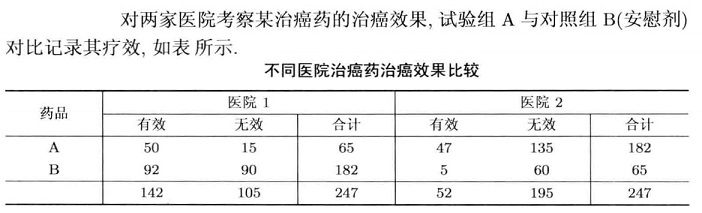

In [23]:
'''
根据公式计算Q值，然后使用自由度为1调用卡方分布的生存函数。
计算结果与R的函数mantelhaen.test有出入。
结论一样：p值远小于0.05，拒绝实验组和对照组治疗效果比值为1的原假设
，两种疗效存在差别。
'''
enh1=65*142/247
var1=65*182*142*105/((247**2)*(247-1))
enh2=182*52/247
var2=182*52*65*195/((247**2)*(247-1))
Q=((50+47-(enh1+enh2))**2)/(var1+var2)
print('Mantel-Haenszel检验统计量：',Q,'，p值：',st.chi2.sf(Q,1))

Mantel-Haenszel检验统计量： 23.011206159110337 ，p值： 1.6105983949463005e-06


### 8.5.4 对数线性模型
- #### 资料来源
使用Statsmodels的广义线性回归（GLM，泊松分布族，log连接函数）实现。具体内容参考：《非参数统计》第2版 第5.7节，王星、褚挺进。清华大学出版社 。<br>
列联表数据的分析以及对数线性模型，可以参看经典教材《属性数据分析引论》第7章，Alan Agresti著，高等教育出版社

- #### 示例：
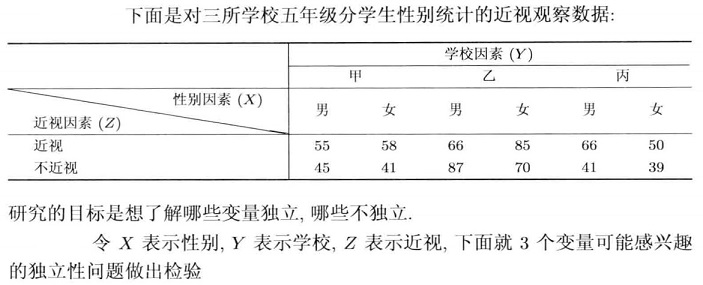


In [24]:
'''
对数线性模型
'''
###单元频数
count1=np.array([55,58,66,85,66,50,45,41,87,70,41,39],dtype='int')
### 近视因素，对近视与非近视进行因子化
f_myopia=np.array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'N'])
###性别因素的因子化，M：男性，F：女性
f_gender=np.array(['M','F','M','F','M','F','M','F','M','F','M','F'])
###学校因素：甲、乙、丙
f_school=np.array(['A','A','B','B','C','C','A','A','B','B','C','C'])
#data=np.vstack([f_myopia ,f_gender ,f_school])
dic1={'count1':count1,'myopia':f_myopia,'gender':f_gender,'school':f_school}
###将数据（除单元频数外）放入一个DataFrame
d_dataframe=pd.DataFrame(dic1)


In [25]:

###(X,Y,Z)
formula1='count1 ~ C(gender)+C(school)+C(myopia)'
###(XY,Z)
formula2='count1 ~ C(myopia)+C(gender)*C(school)'
###(X,YZ)
formula3='count1 ~ C(gender)+C(school)*C(myopia)'
###(Y,XZ)
formula4='count1 ~ C(school)+C(myopia)*C(gender)'
###(XY,XZ)
formula5='count1 ~ C(gender)*C(school)+C(gender)*C(myopia)'
###(XY,YZ)
formula6='count1 ~ C(gender)*C(school)+C(school)*C(myopia)'
###(XZ,YZ)
formula7='count1 ~ C(gender)*C(myopia)+C(school)*C(myopia)'

###模型与公式
models=np.array(['(X, Y, Z)','(XY, Z)','(X, YZ)','(Y, XZ)','(XY, XZ)','(XY, YZ)','(XZ, YZ)'])
formulas=np.array([formula1,formula2,formula3,formula4,formula5,formula6,formula7])

In [26]:
df=[]#自由度
LRT=[]#对数似然比
LRT_p=[]#对似然比的p值
PQ=[]#Pearson Q值
PQ_p=[]#Pearson Q值的p值
conclusions=[]#独立与否的结论

###对上述7个模型的公式分别调用glm，广义线性模型（泊松分布族和log连接函数）
#Poisson()类构造器默认使用log连接函数
for formula in formulas:
    result=smf.glm(formula,data=d_dataframe,
                   family=sm.families.Poisson()).fit(use_t=True)
    LRT.append(np.round(result.deviance,6))#对数似然比=回归结果的偏差
    PQ.append(np.round(result.pearson_chi2,6))#Pearson Q等于结果中的Pearson卡方值
    #对数似然比的卡方检验p值
    LRT_p.append(np.round(st.chi2.sf(result.deviance,result.df_resid),8))
    df.append(result.df_resid)#自由度
    #Pearson Q统计量的卡方检验的p值
    q_p=st.chi2.sf(result.pearson_chi2,result.df_resid)
    
    ###根据Pearson Q统计量的卡方检验的p值判定是否独立。
    #设alpha=0.1，相对宽松的置信度。
    #也可以使用对数似然比的卡方检验p值判定是否独立。
    if q_p>=0.1:
        conclusions.append('独立')
    else:
        conclusions.append('不独立')
    PQ_p.append(np.round(q_p,8))

dic_data={'模型':models,'自由度':df,'LRT G2':LRT,'p值1':LRT_p,
          'Pearson Q':PQ,'p值2':PQ_p,'结论':conclusions}
goodness=pd.DataFrame(dic_data)
goodness

模型  自由度     LRT G2       p值1  Pearson Q       p值2   结论
0  (X, Y, Z)    7  12.174808  0.094955  12.115692  0.096818  不独立
1    (XY, Z)    5  10.912539  0.053142  10.903892  0.053319  不独立
2    (X, YZ)    5   6.360043  0.272744   6.346698  0.273930   独立
3    (Y, XZ)    6  10.852045  0.093058  10.926133  0.090686  不独立
4   (XY, XZ)    4   9.589775  0.047935   9.538042  0.048971  不独立
5   (XY, YZ)    3   5.097773  0.164776   5.088329  0.165442   独立
6   (XZ, YZ)    4   5.037279  0.283494   5.024954  0.284747   独立

_________________